Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan Status Prediction Accuracy: 79.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56        37
           1       0.80      0.95      0.87        86

    accuracy                           0.80       123
   macro avg       0.80      0.69      0.71       123
weighted avg       0.80      0.80      0.78       123



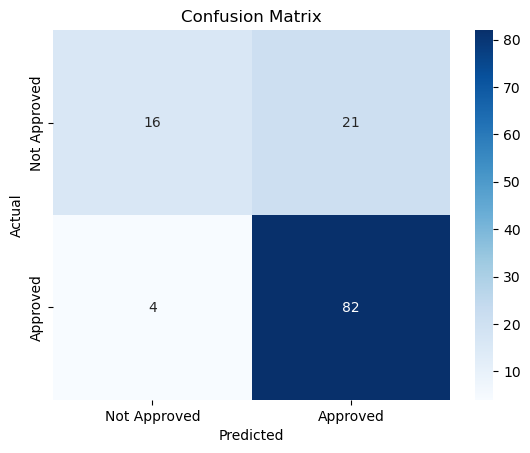

Predicted Loan Status: Approved


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
df = pd.read_csv(url)

# Rename columns to match the provided description
df.columns = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area', 'Loan_Status'
]

# Check for missing values
print(df.isnull().sum())

# Fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Gender'] = imputer.fit_transform(df[['Gender']]).ravel()
df['Married'] = imputer.fit_transform(df[['Married']]).ravel()
df['Dependents'] = imputer.fit_transform(df[['Dependents']]).ravel()
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']]).ravel()
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']]).ravel()
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']]).ravel()
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']]).ravel()

# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_married = LabelEncoder()
df['Married'] = le_married.fit_transform(df['Married'])

le_education = LabelEncoder()
df['Education'] = le_education.fit_transform(df['Education'])

le_self_employed = LabelEncoder()
df['Self_Employed'] = le_self_employed.fit_transform(df['Self_Employed'])

le_property_area = LabelEncoder()
df['Property_Area'] = le_property_area.fit_transform(df['Property_Area'])

le_loan_status = LabelEncoder()
df['Loan_Status'] = le_loan_status.fit_transform(df['Loan_Status'])

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Prepare features and target variables
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
        'Credit_History', 'Property_Area']]

y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Loan Status Prediction Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# To make predictions on new data
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': [1],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1.0],
    'Property_Area': ['Urban']
})

new_data['Gender'] = le_gender.transform(new_data['Gender'])
new_data['Married'] = le_married.transform(new_data['Married'])
new_data['Education'] = le_education.transform(new_data['Education'])
new_data['Self_Employed'] = le_self_employed.transform(new_data['Self_Employed'])
new_data['Property_Area'] = le_property_area.transform(new_data['Property_Area'])

predicted_status = rf_clf.predict(new_data)
print(f'Predicted Loan Status: {"Approved" if predicted_status[0] == 1 else "Not Approved"}')
